In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("IMDB Dataset.csv") 
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

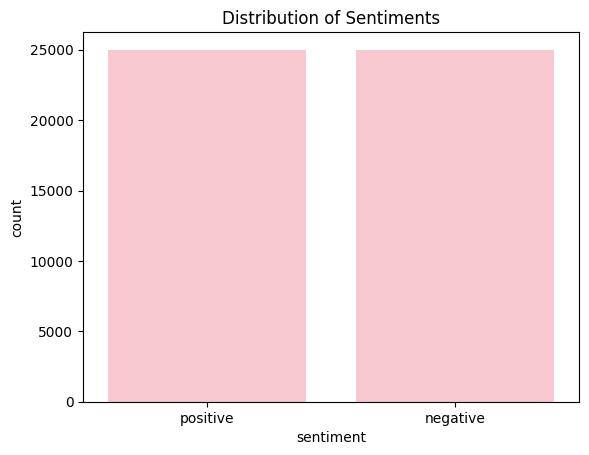

In [5]:
sns.countplot(x='sentiment', data=df,color='pink') 
plt.title("Distribution of Sentiments") 
plt.show()


In [9]:
X = df['review'] 
y = df['sentiment']  # values should be 'positive' or 'negative'


In [10]:
#Convert text to numerical features
vectorizer = CountVectorizer(stop_words='english') 
X_vec = vectorizer.fit_transform(X)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [12]:
model = MultinomialNB() 
model.fit(X_train, y_train)


MultinomialNB()

In [13]:
y_pred = model.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8566

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.88      0.86      4961
    positive       0.87      0.84      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



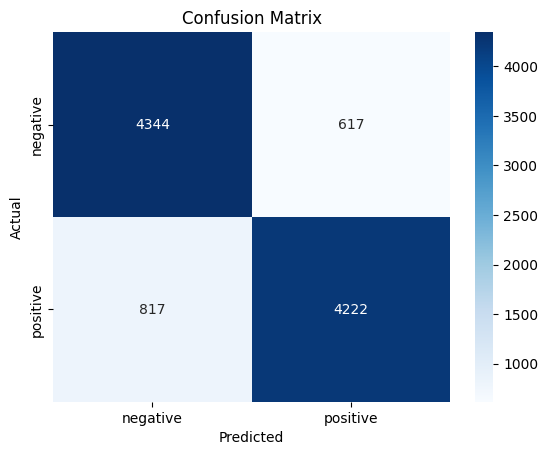

In [16]:
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',color='pink', xticklabels=model.classes_, yticklabels=model.classes_) 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show()


In [17]:
new_review = ["The movie was fantastic, I really enjoyed it!"] 
new_vec = vectorizer.transform(new_review) 
new_pred = model.predict(new_vec) 
print("New Review:", new_review[0]) 
print("Predicted Sentiment:",new_pred[0])

New Review: The movie was fantastic, I really enjoyed it!
Predicted Sentiment: positive
